In [1]:
import NumPy_OneTickQuery
import datetime
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
def getReturns_query(pattern):
    argument_string = ""
    argument_string += " -context 'JUPITER50001'"
    argument_string += " -otq_file 'C:/OMD/client_data/otqs/alphabet_portfolio.otq::getReturns'"
    argument_string += " -s '20160101000000'"
    argument_string += " -e '20170101000000'"
    argument_string += " -otq_params VolBucketIntTicks=30,BucketIntSec=86400,DB=BATS"
    
    symbol_specs = []
    symbol_specs.append( ("eval(C:/OMD/client_data/otqs/alphabet_portfolio.otq::getSymbols, DB=BATS, PATTERN=" + pattern + "%)", []))
    
    return argument_string, symbol_specs

### Get returns and write to files

In [9]:
print(datetime.datetime.now())

patterns = list(string.ascii_uppercase) # ['A', 'B', ... 'Z']
patterns = patterns[:2]
X = []

for p in patterns:
    symbol_specs = []
    symbol_specs.append( ("eval(C:/OMD/client_data/otqs/alphabet_portfolio.otq::getSymbols, DB=BATS, PATTERN=" + p + "%)", []) )
    argument_string = getReturns_query(p)[0]
    X.append(NumPy_OneTickQuery.run_query([argument_string , symbol_specs ]))
    
# write returns to files
returns = []
for i in range(len(X)):
    # Put data in pandas DataFrame and make simple plots
    returns.append(X[i][0][1][1][1])
    np.savetxt('../output/alphabet_portfolio/returns_' + patterns[i] + '.csv', returns[i], delimiter=',')
    
print(datetime.datetime.now())

2017-04-11 16:21:16.631481
2017-04-11 16:27:07.600181


### Compare distributions

In [15]:
from scipy import stats

In [16]:
stats.ks_2samp(returns[0], returns[1])

Ks_2sampResult(statistic=0.063492063492063489, pvalue=0.67615647616238106)

### Plot some data

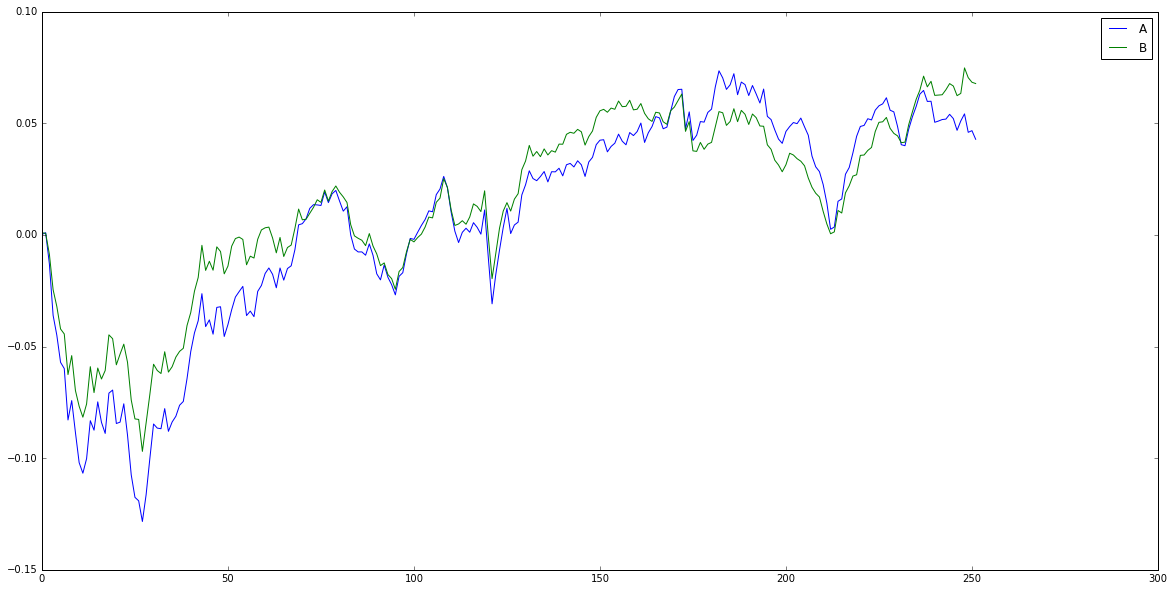

In [23]:
cum_returns = np.cumsum(returns, axis = 1)
plt.figure(figsize=(20,10))
for i in [0,1]:
    plt.plot(cum_returns[i], label=patterns[i])
plt.legend(loc='best')

In [29]:
df_SP500 = []
for i in range(len(X)):
    # Put data in pandas DataFrame and make simple plots
    df_SP500.append(pd.DataFrame({'returns':X[i][0][1][1][1],'total_return':X[i][0][1][2][1]}, index=X[i][0][1][0][1]))

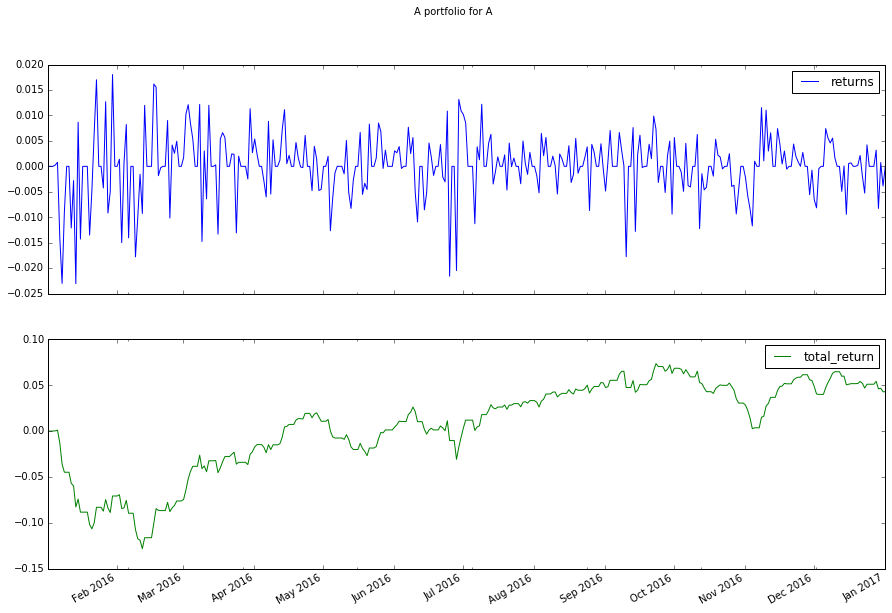

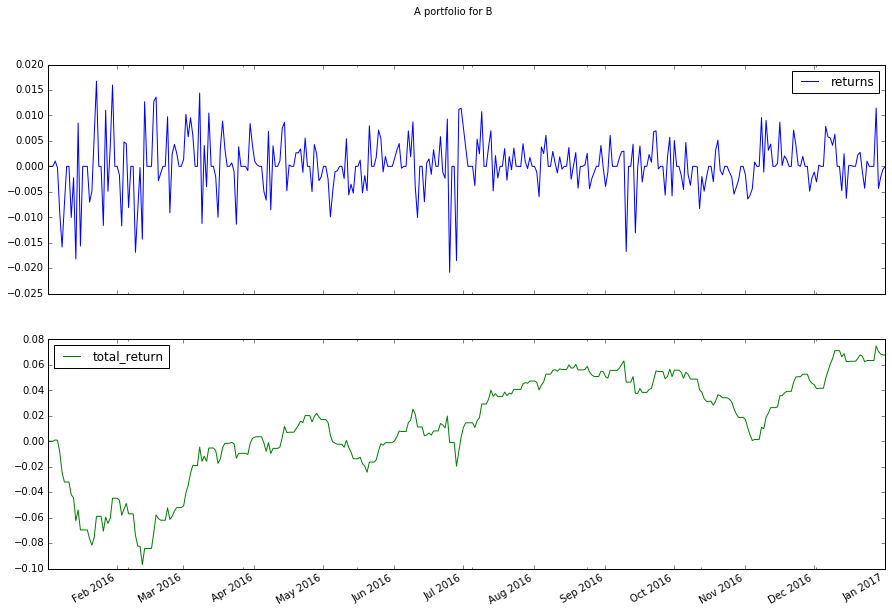

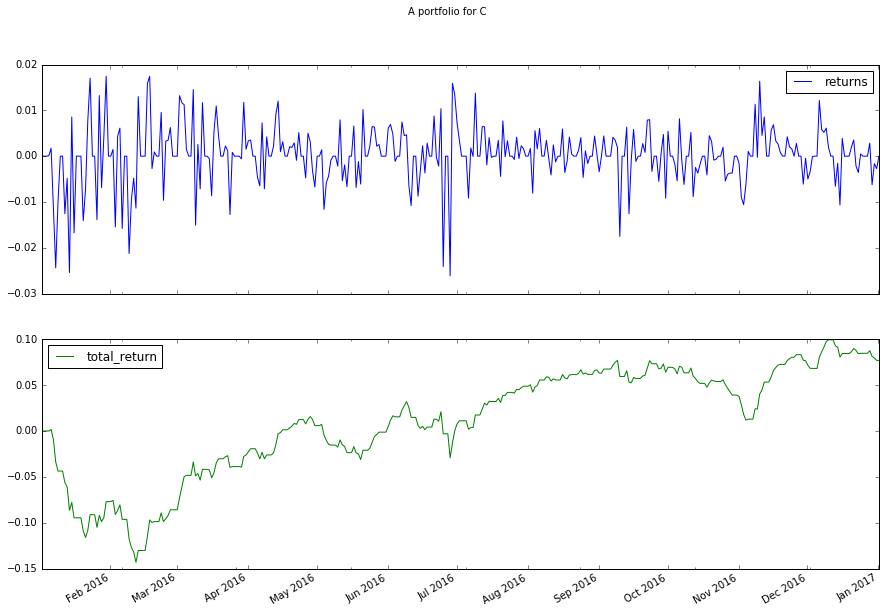

In [30]:
for i in range(len(X)):    
    df_SP500[i].plot(subplots=True, figsize=(15,10), title='A portfolio for ' + patterns[i])

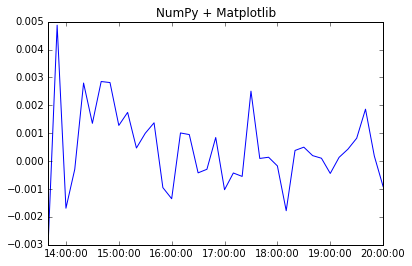

In [11]:
# Use numpy + matplotlib
returns = X[0][1][1][1]
total_return = X[0][1][2][1]
ts = X[0][1][0][1]
plt.plot(ts,returns)
plt.title('NumPy + Matplotlib')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A785CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000001097668>], dtype=object)

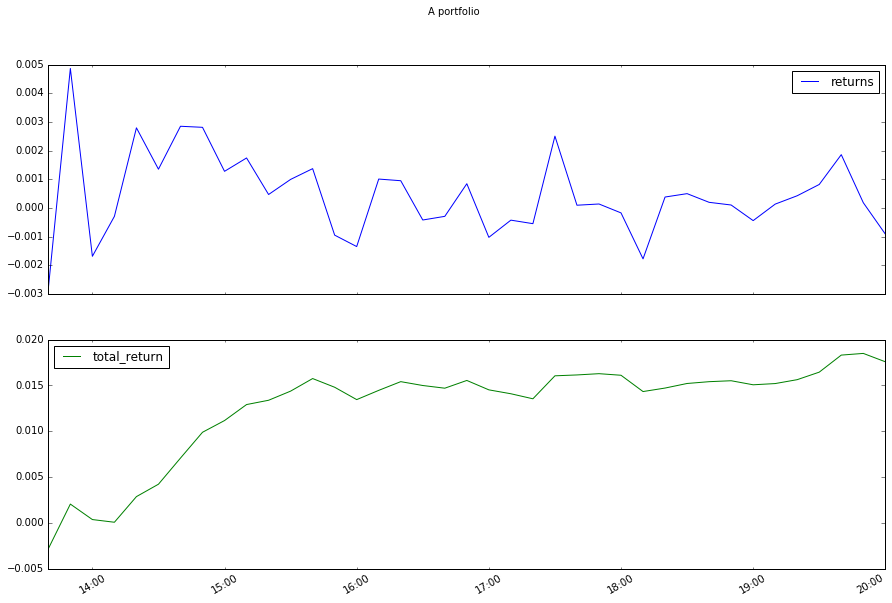

In [10]:
# Put data in pandas DataFrame and make simple plots
df_SP500_A = pd.DataFrame({'returns':X[0][1][1][1],'total_return':X[0][1][2][1]}, index=X[0][1][0][1])
                 
#print(df_CSCO.index)
df_SP500_A.plot(subplots=True, figsize=(15,10), title='A portfolio')